<a href="https://colab.research.google.com/github/mokshmahajan2004/Deep-Learning-Assignments/blob/main/Assignment_2_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Name: **Moksh Mahajan**  

Roll No: **102206084**

Subgroup: **4F1C**

Given a Dataset use ANN regression for curve fit.

✅ Dataset saved as sine_dataset.csv


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Training Completed
Test MAE: 0.0767
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


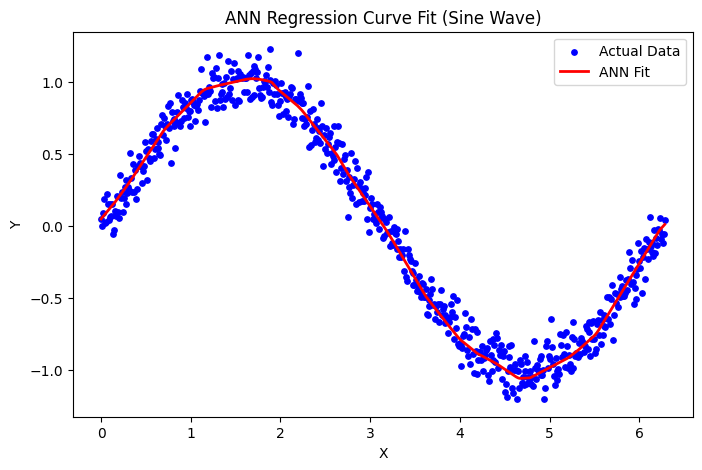

In [ ]:
# =========================================
# ANN Regression for Curve Fitting (Sine Example)
# =========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -------------------------------
# 1. Generate Synthetic Dataset
# -------------------------------
np.random.seed(42)

X = np.linspace(0, 2*np.pi, 600)   # input values
y = np.sin(X) + 0.1*np.random.randn(600)  # sine curve with noise

# Save to CSV
data = pd.DataFrame({"X": X, "Y": y})
data.to_csv("sine_dataset.csv", index=False)
print("✅ Dataset saved as sine_dataset.csv")

# -------------------------------
# 2. Preprocess Data
# -------------------------------
X = data[["X"]].values
y = data["Y"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Scale inputs (important for ANN training)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------------
# 3. Build ANN Model
# -------------------------------
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)   # output layer (regression → no activation)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# -------------------------------
# 4. Train the Model
# -------------------------------
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=200,
                    batch_size=16,
                    verbose=0)

print("✅ Training Completed")

# -------------------------------
# 5. Evaluate Model
# -------------------------------
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.4f}")

# -------------------------------
# 6. Plot Curve Fit
# -------------------------------
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', s=15, label="Actual Data")

# Smooth prediction line
X_line = np.linspace(0, 2*np.pi, 400).reshape(-1,1)
X_line_scaled = scaler.transform(X_line)
y_line = model.predict(X_line_scaled)

plt.plot(X_line, y_line, color='red', linewidth=2, label="ANN Fit")
plt.legend()
plt.title("ANN Regression Curve Fit (Sine Wave)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
